In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math as math 

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import mutual_info_regression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn import neighbors 
import sklearn.metrics as metrics




In [2]:
data = pd.read_excel('../../data_sets/Volumetric_features.xlsx')
data.head()


data_features = pd.DataFrame(data, columns = data.columns[:-1])
data_features= data.drop(['S.No','Age'], axis=1)

data.head()
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [3]:
dataDd = data.copy()
dataDd.drop_duplicates(inplace=True) #this function get rid of the duplicate if there are any in the dataset 
dataDd.shape #this function returns the shape of the array 

(4226, 141)

In [4]:
data=dataDd #replacing health data to healthDd data 
del dataDd #deleting healthDd  
data.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(data_features)
n = 30
pca = PCA(n_components=n)
pca_data = pca.fit_transform(x)

labels = data_features.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_data, columns=columns)
print(pca_df.head)
pca_df.head()

<bound method NDFrame.head of       rh_MeanThickness_thickness  CerebralWhiteMatterVol  \
0                       1.840744                1.321500   
1                       1.504346                1.534836   
2                       2.146013                1.383164   
3                       4.398688                1.333800   
4                       3.513663                1.666509   
...                          ...                     ...   
4221                    3.387602                2.293603   
4222                    4.318619               -2.464529   
4223                    7.884517                2.257236   
4224                   -0.705399                2.504492   
4225                   -2.416250               -3.513196   

      Left-Lateral-Ventricle  lh_lateralorbitofrontal_thickness  SurfaceHoles  \
0                   1.394932                          -1.602035     -1.853765   
1                   1.649476                          -0.732743     -1.406371   
2     

,rh_MeanThickness_thickness,CerebralWhiteMatterVol,Left-Lateral-Ventricle,lh_lateralorbitofrontal_thickness,SurfaceHoles,CC_Posterior,rh_caudalanteriorcingulate_thickness,CC_Posterior,Right-Caudate,lh_parahippocampal_thickness,...,lh_rostralanteriorcingulate_thickness,5th-Ventricle,5th-Ventricle,non-WM-hypointensities,Right-Cerebellum-White-Matter,Left-Cerebellum-Cortex,lh_rostralanteriorcingulate_thickness,lh_temporalpole_thickness,rh_temporalpole_thickness,rh_temporalpole_thickness
0,1.840744,1.321500,1.394932,-1.602035,-1.853765,2.513362,-1.202301,-0.160003,-0.474961,1.586798,...,-0.438779,-0.389590,0.863888,0.311862,-1.526254,0.283650,0.185415,-0.258881,0.261888,-0.462082
1,1.504346,1.534836,1.649476,-0.732743,-1.406371,2.331837,-1.484580,-0.546427,-0.920332,1.745460,...,0.081686,-0.181187,0.883121,0.375745,-1.601178,0.463894,0.273562,-0.178921,0.193384,-0.610400
2,2.146013,1.383164,1.484228,-1.175085,-1.192215,2.118889,-2.212283,-0.532898,-1.271413,1.495107,...,-0.286264,0.014833,0.696286,0.293890,-1.548642,0.394018,-0.007408,0.114392,0.122057,-0.412596
3,4.398688,1.333800,1.097192,-0.320481,-1.387413,2.403227,-1.109582,-1.291015,-1.037327,1.353293,...,-0.612223,-0.001893,0.691676,-0.381844,-1.227971,0.419516,0.328495,-0.363516,0.079433,-0.598125
4,3.513663,1.666509,2.122816,-0.901426,-1.332935,3.048057,-1.247216,-0.533652,-0.685237,1.555901,...,-0.147454,-0.485927,0.596970,-0.161772,-1.164772,0.259221,-0.532640,-0.348243,0.303262,-0.851982


In [10]:
#Training 

X_train, X_test, y_train, y_test = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)


X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.25, random_state=33)




In [11]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.648101965688445
RMSE value for k=  2 is: 8.359691020741385
RMSE value for k=  3 is: 8.251580116770368
RMSE value for k=  4 is: 7.590064570784576
RMSE value for k=  5 is: 7.6810843377594535
RMSE value for k=  6 is: 7.726667385677275
RMSE value for k=  7 is: 7.633051623626607
RMSE value for k=  8 is: 7.520142958609532
RMSE value for k=  9 is: 7.560471332165763
RMSE value for k=  10 is: 7.557789933521922
RMSE value for k=  11 is: 7.44460545090626
RMSE value for k=  12 is: 7.4477191610791875
RMSE value for k=  13 is: 7.341558909162414
RMSE value for k=  14 is: 7.308381972385777
RMSE value for k=  15 is: 7.3691478220104605
RMSE value for k=  16 is: 7.46153659120471
RMSE value for k=  17 is: 7.510134390347215
RMSE value for k=  18 is: 7.5371469231383355
RMSE value for k=  19 is: 7.602820518801704
RMSE value for k=  20 is: 7.656120378186528


<AxesSubplot:>

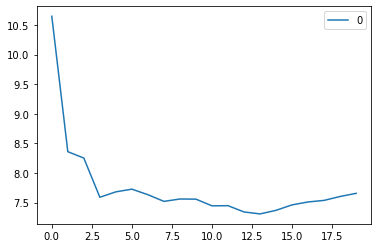

In [12]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#From the plot K=14

In [13]:
kNN = neighbors.KNeighborsRegressor(14)

kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)

In [14]:

mean_qerror = metrics.mean_squared_error(y_test, y_pred)
root_mean_qerror = np.sqrt(mean_qerror)


print("R squared: " + str(metrics.explained_variance_score(y_test, y_pred)))
print("Max Error: " + str(metrics.max_error(y_test, y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', +(np.sqrt(mean_qerror)))


R squared: 0.8645120790578249
Max Error: 21.92857142857143
Mean absolute error: 5.621967654986524
Mean squared error: 53.41244705429342
Root Mean Squared Error: 7.308381972385777


Train: (700, 100) (700,)
Test: (300, 100) (700,)
